In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats

In [2]:
data = loadmat('ex8data1.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']

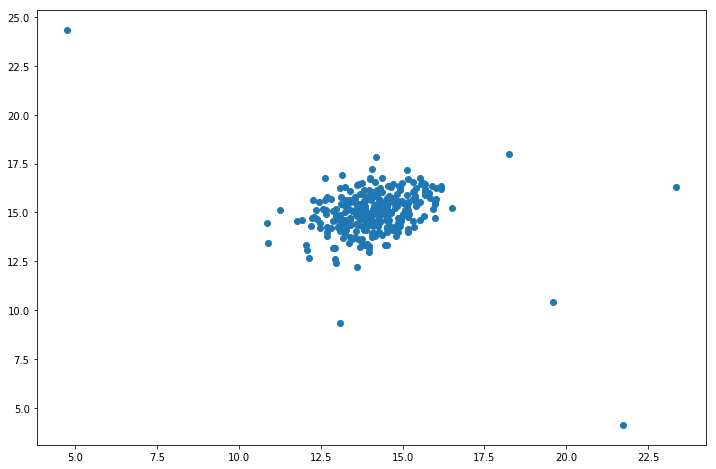

In [3]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
miu = X.mean(axis = 0)
sigma = X.var(axis = 0)
miu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [5]:
p = np.zeros(X.shape)
p[:,0] = stats.norm(miu[0], sigma[0]).pdf(X[:,0]) # 正态分布并获取概率
p[:,1] = stats.norm(miu[1], sigma[1]).pdf(X[:,1])

In [6]:
pval = np.zeros(Xval.shape)
pval[:,0] = stats.norm(miu[0], sigma[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(miu[1], sigma[1]).pdf(Xval[:,1])

In [7]:
def selectThreshold(pval, yval):
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    step = (pval.max() - pval.min()) / 1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype('float')
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype('float')
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype('float')
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        F1 = (2 * precision * recall) / (precision + recall)
        
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    
    return bestEpsilon, bestF1

In [8]:
epsilon, f1 = selectThreshold(pval, yval)
epsilon, f1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


(0.009566706005956842, 0.7142857142857143)

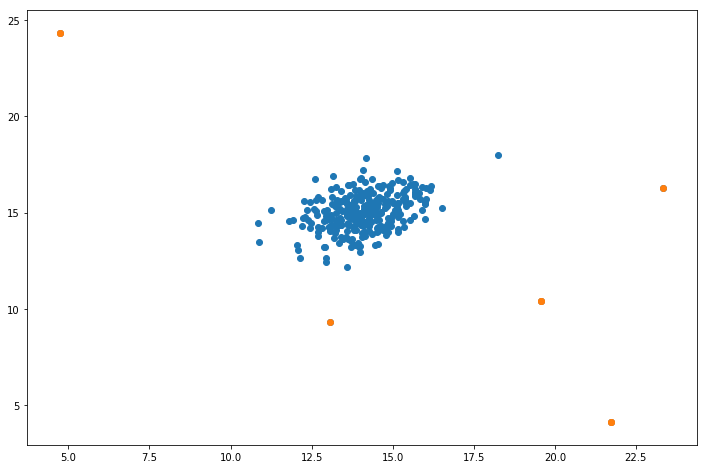

In [9]:
abnormalIndex = np.where(p < epsilon)
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[abnormalIndex[0], 0], X[abnormalIndex[0], 1])
plt.show()